In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import user, password, host
from pydataset import data
from scipy import stats


### Correlation


In [3]:
url1 = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
url2 = f'mysql+pymysql://{user}:{password}@{host}/employees'

query1 = '''
SELECT * FROM customers
'''

queryjoin = '''
SELECT * FROM employees e
JOIN salaries s
USING (emp_no)
JOIN titles t
USING (emp_no)
'''


In [4]:
tc_df = pd.read_sql(query1,url1)

In [129]:
emp_df = pd.read_sql(queryjoin,url2)

In [130]:
# I wanted to make sure salary and title was accurately portrayed, 
# using .head(20) the title results were static, 
# so I had to check the tail to see if that was just how that employee's time went
# or if it was a loading/joining issue.
emp_df.tail(20)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
4638487,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,45702,1996-12-26,1997-12-26,Senior Staff,1998-12-27,9999-01-01
4638488,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,46206,1997-12-26,1998-12-26,Senior Staff,1998-12-27,9999-01-01
4638489,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,47429,1998-12-26,1999-12-26,Senior Staff,1998-12-27,9999-01-01
4638490,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,49971,1999-12-26,2000-12-25,Senior Staff,1998-12-27,9999-01-01
4638491,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,51182,2000-12-25,2001-12-25,Senior Staff,1998-12-27,9999-01-01
4638492,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01
4638493,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,40000,1993-12-27,1994-12-27,Staff,1993-12-27,1998-12-27
4638494,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,42140,1994-12-27,1995-12-27,Staff,1993-12-27,1998-12-27
4638495,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,42357,1995-12-27,1996-12-26,Staff,1993-12-27,1998-12-27
4638496,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,45702,1996-12-26,1997-12-26,Staff,1993-12-27,1998-12-27


In [131]:
sleep_df = data('sleepstudy')

1. Use the telco_churn data. 
- Does tenure correlate with monthly charges? 
- Total charges? 
- What happens if you control for phone and internet service?


In [6]:
tc_df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,No,Yes,No,No,3,Yes,4,84.65,5377.8,No
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,No,1,Yes,1,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No


Tenure and Monthly Charges:

- H0: There is no linear correalation between length of tenure and monthly charges.
- Ha: There is a linear correalation between length of tenure and monthly charges.

In [133]:
#Pre-set values:
n = tc_df.shape[0]
deg_freedom = n - 2
conf_interval = .95
alf = 1 - conf_interval # same as alf = .05, alf is a personal touch for Alpha, it was the nickname of a beloved pet, and Alpha reminds me of it.

In [134]:

x = tc_df.tenure
y = tc_df.monthly_charges


In [135]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24789985628615008, 4.0940449915016345e-99)

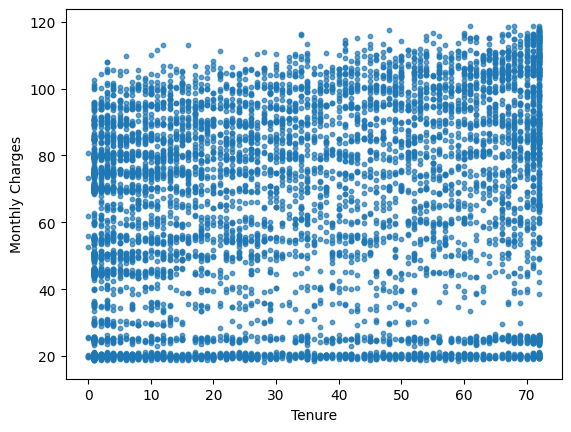

In [136]:
plt.scatter(x,y, s=10, alpha=.7)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

In [137]:
corr, p = stats.spearmanr(x,y, axis=None)
corr, p

(0.27641678933130215, 1.0271266876409408e-123)

Correlation Coefficent:

    Measured between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.

In [138]:
round(corr, 3)

0.276

0.276 is closer to 0 than either 1 or -1, so if there is a correlation, it is weaker at best. The above scatter plot shows that Tenure and Monthly Charges are fairly evenly distributed across the board. The clusters around the lower end of monthly charges are most likely being affected by something else, and they're still uniform across length of tenure.

Tenure and Total Charges:

- H0: There is no linear relationship between Tenure and Total Charges.
- Ha: There is a linear relationship between Tenure and Total Charges.

In [16]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [34]:
# tc_df = tc_df.dropna() wasn't working, so a little creative workaround was needed. 
# Apparently I actually need more things before I can .dropna() so, this is quicker [imo] as long as it works for all the odd values.
tc_df = tc_df[tc_df.total_charges != ' ']

In [25]:
x = tc_df.tenure
y = tc_df.total_charges

In [27]:
y = y.astype(float)

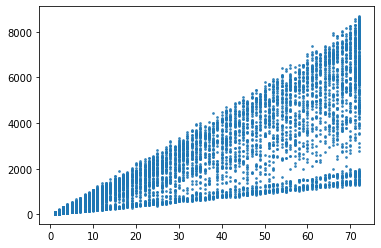

In [28]:
plt.scatter(x,y, s= 3, alpha=.8)
plt.show()

In [29]:
corr, p = stats.spearmanr(x, y)
corr, p

(0.8891770805365491, 0.0)

In [31]:
round(corr, 2)

0.89

Correlation is ~.89, since it's closest to 1, it's a stronger positive correlation!

Using Phone and Internet Services as a Control:

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?



Use the sleepstudy data. Is there a relationship between days and reaction time?